In [ ]:
#Primero, instalamos el paquete para analizar la actividad de spotify

!pip install Spotipy

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
credenciales = pd.read_csv('C:/Users/Administrator/Desktop/Facu/Python aplicado a DS/Credenciales Spotify.csv')

In [44]:
#Creamos una app en Spotify, obteniendo así el Client ID, 

cid = credenciales['cid'][0] # Client ID; copy this from your app created on beta.developer.spotify.com
secret = credenciales['secret'][0] # Client Secret; copy this from your app
username = credenciales['username'][0] # Your Spotify username

scope = 'user-library-read playlist-modify-public playlist-read-private'

redirect_uri='http://localhost:7777/callback'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username, scope, cid, secret, redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [6]:
#Creamos el DataFrame con la playlist de mi usuario (en este caso 'La Posta' y lo features de las canciones)


sourcePlaylistID_diego = '4QJbyT1obgOzOmFQGZe4Wo'
sourcePlaylist_diego = sp.user_playlist('Diego Andrés Lauricella', sourcePlaylistID_diego);
tracks_diego = sourcePlaylist_diego["tracks"];
songs_diego = tracks_diego["items"];


track_ids_diego = []
track_names_diego = []

for i in range(0, len(songs_diego)):
    if songs_diego[i]['track']['id'] != None:
        track_ids_diego.append(songs_diego[i]['track']['id'])
        track_names_diego.append(songs_diego[i]['track']['name'])

features_diego = []
for i in range(0,len(track_ids_diego)):
    audio_features_diego = sp.audio_features(track_ids_diego[i])
    for track in audio_features_diego:
        features_diego.append(track)
        
playlist_diego = pd.DataFrame(features_diego, index = track_names_diego)

In [48]:
playlist_baigo.mean()

danceability             0.579690
energy                   0.730530
key                      5.440000
loudness                -7.550200
mode                     0.530000
speechiness              0.053678
acousticness             0.176107
instrumentalness         0.117987
liveness                 0.191685
valence                  0.609536
tempo                  120.586150
duration_ms         250193.780000
time_signature           3.970000
dtype: float64

In [7]:
sourcePlaylistID_fran = '2qaYQ3EVbM1RYRuTBkHknp'
sourcePlaylist_fran = sp.user_playlist('francolaucella27', sourcePlaylistID_fran);
tracks_fran = sourcePlaylist_fran["tracks"];
songs_fran = tracks_fran["items"];


track_ids_fran = []
track_names_fran = []

for i in range(0, len(songs_fran)):
    if songs_fran[i]['track']['id'] != None:
        track_ids_fran.append(songs_fran[i]['track']['id'])
        track_names_fran.append(songs_fran[i]['track']['name'])

features_fran = []
for i in range(0,len(track_ids_fran)):
    audio_features_fran = sp.audio_features(track_ids_fran[i])
    for track in audio_features_fran:
        features_fran.append(track)
        
playlist_fran = pd.DataFrame(features_fran, index = track_names_fran)

In [46]:
playlist_fran.mean()

danceability             0.482488
energy                   0.832349
key                      4.860465
loudness                -5.122116
mode                     0.767442
speechiness              0.070291
acousticness             0.047213
instrumentalness         0.091401
liveness                 0.184160
valence                  0.545558
tempo                  129.027023
duration_ms         215112.813953
time_signature           3.930233
dtype: float64

In [8]:
sourcePlaylistID_baigo = '5StZTqOgEVEjsfcFJI3RVD'
sourcePlaylist_baigo = sp.user_playlist('iphone5juan', sourcePlaylistID_baigo);
tracks_baigo = sourcePlaylist_baigo["tracks"];
songs_baigo = tracks_baigo["items"];


track_ids_baigo = []
track_names_baigo = []

for i in range(0, len(songs_baigo)):
    if songs_baigo[i]['track']['id'] != None:
        track_ids_baigo.append(songs_baigo[i]['track']['id'])
        track_names_baigo.append(songs_baigo[i]['track']['name'])

features_baigo = []
for i in range(0,len(track_ids_baigo)):
    audio_features_baigo = sp.audio_features(track_ids_baigo[i])
    for track in audio_features_baigo:
        features_baigo.append(track)
        
playlist_baigo = pd.DataFrame(features_baigo, index = track_names_baigo)

In [49]:
datatotal = playlist_diego.append([playlist_fran,playlist_baigo])

datatotal

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Third Wind,0.296,0.699,10,-11.233,1,0.0342,0.5130,0.895000,0.0469,0.815,152.998,audio_features,7F3soQckTl2CKQle4oJw66,spotify:track:7F3soQckTl2CKQle4oJw66,https://api.spotify.com/v1/tracks/7F3soQckTl2C...,https://api.spotify.com/v1/audio-analysis/7F3s...,513000,4
At Midnight,0.622,0.662,7,-11.839,0,0.0253,0.1010,0.920000,0.0774,0.929,100.370,audio_features,0CiY7ezvUqYC63JDE5oxCV,spotify:track:0CiY7ezvUqYC63JDE5oxCV,https://api.spotify.com/v1/tracks/0CiY7ezvUqYC...,https://api.spotify.com/v1/audio-analysis/0CiY...,240840,4
Summer Breezin',0.553,0.675,1,-11.603,0,0.0336,0.1940,0.103000,0.0588,0.941,151.990,audio_features,2Ostk9iHdu2vRQMJ7sJycp,spotify:track:2Ostk9iHdu2vRQMJ7sJycp,https://api.spotify.com/v1/tracks/2Ostk9iHdu2v...,https://api.spotify.com/v1/audio-analysis/2Ost...,290333,4
Sleep Away,0.507,0.137,5,-21.449,0,0.0393,0.9390,0.929000,0.1120,0.256,99.496,audio_features,5YHPH0wpc5IMqNNrbN3JMm,spotify:track:5YHPH0wpc5IMqNNrbN3JMm,https://api.spotify.com/v1/tracks/5YHPH0wpc5IM...,https://api.spotify.com/v1/audio-analysis/5YHP...,201227,3
Sweet Sensation,0.656,0.829,10,-5.768,0,0.0410,0.0305,0.848000,0.1320,0.818,96.019,audio_features,59LoDai7IGmfmU1g4NEN0k,spotify:track:59LoDai7IGmfmU1g4NEN0k,https://api.spotify.com/v1/tracks/59LoDai7IGmf...,https://api.spotify.com/v1/audio-analysis/59Lo...,270747,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ladies Night - Single Version,0.675,0.753,11,-7.564,1,0.1670,0.2210,0.000025,0.0495,0.898,111.790,audio_features,5ooXVyB1FAmkr0DM6h5HWC,spotify:track:5ooXVyB1FAmkr0DM6h5HWC,https://api.spotify.com/v1/tracks/5ooXVyB1FAmk...,https://api.spotify.com/v1/audio-analysis/5ooX...,207533,4
Get Down On It,0.880,0.633,7,-6.331,1,0.0610,0.2190,0.000039,0.0609,0.970,110.864,audio_features,4cdOa74e9tBGA6FaVT5mgc,spotify:track:4cdOa74e9tBGA6FaVT5mgc,https://api.spotify.com/v1/tracks/4cdOa74e9tBG...,https://api.spotify.com/v1/audio-analysis/4cdO...,212907,4
Super Freak,0.838,0.794,9,-8.245,0,0.0531,0.2200,0.000000,0.0575,0.962,132.446,audio_features,2dCmGcEOQrMQhMMS8Vj7Ca,spotify:track:2dCmGcEOQrMQhMMS8Vj7Ca,https://api.spotify.com/v1/tracks/2dCmGcEOQrMQ...,https://api.spotify.com/v1/audio-analysis/2dCm...,205467,4
September,0.697,0.809,9,-8.197,1,0.0302,0.1140,0.000521,0.1830,0.980,125.941,audio_features,5nNmj1cLH3r4aA4XDJ2bgY,spotify:track:5nNmj1cLH3r4aA4XDJ2bgY,https://api.spotify.com/v1/tracks/5nNmj1cLH3r4...,https://api.spotify.com/v1/audio-analysis/5nNm...,214827,4


In [53]:
datatotal.sort_values(by=['danceability']).head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Holiday in Cambodia,0.133,0.927,7,-5.371,1,0.0741,0.003440,0.000440,0.0915,0.5000,197.708,audio_features,2OuNnwnNQyWrF47pthWxNb,spotify:track:2OuNnwnNQyWrF47pthWxNb,https://api.spotify.com/v1/tracks/2OuNnwnNQyWr...,https://api.spotify.com/v1/audio-analysis/2OuN...,224867,4
"Schönen Gruss, auf Wiederseh'n",0.173,0.899,9,-3.286,1,0.0601,0.002650,0.000000,0.1280,0.3850,74.786,audio_features,0fs9ytpwJ3aK5MCdEAdeN1,spotify:track:0fs9ytpwJ3aK5MCdEAdeN1,https://api.spotify.com/v1/tracks/0fs9ytpwJ3aK...,https://api.spotify.com/v1/audio-analysis/0fs9...,215507,4
"Ce matin-là - From ""L'uomo in più""",0.210,0.445,8,-11.990,1,0.0330,0.726000,0.510000,0.0888,0.1640,102.089,audio_features,7yieArGOFIdoGJv1V8hDr2,spotify:track:7yieArGOFIdoGJv1V8hDr2,https://api.spotify.com/v1/tracks/7yieArGOFIdo...,https://api.spotify.com/v1/audio-analysis/7yie...,219040,4
All Aboard!,0.222,0.480,9,-11.746,1,0.0584,0.279000,0.486000,0.1020,0.0536,141.337,audio_features,4wpsifc2PVBZntCpcck3PQ,spotify:track:4wpsifc2PVBZntCpcck3PQ,https://api.spotify.com/v1/tracks/4wpsifc2PVBZ...,https://api.spotify.com/v1/audio-analysis/4wps...,158600,4
Rainy Night in Georgia,0.226,0.512,7,-10.535,1,0.0390,0.031900,0.905000,0.4480,0.2640,151.310,audio_features,1mRmNpeDpEbPXQluq7hmTe,spotify:track:1mRmNpeDpEbPXQluq7hmTe,https://api.spotify.com/v1/tracks/1mRmNpeDpEbP...,https://api.spotify.com/v1/audio-analysis/1mRm...,228893,4
"Departure! (From ""Hunter x Hunter"")",0.248,0.916,10,-2.920,1,0.0471,0.000003,0.821000,0.1210,0.3050,159.970,audio_features,5LKT9HCwyBNBn3tLWkgFYL,spotify:track:5LKT9HCwyBNBn3tLWkgFYL,https://api.spotify.com/v1/tracks/5LKT9HCwyBNB...,https://api.spotify.com/v1/audio-analysis/5LKT...,266630,4
Melody Lee,0.256,0.941,11,-9.477,0,0.1140,0.004450,0.001230,0.1350,0.1300,108.367,audio_features,0ixm9UqdfzTGfxKWMMZk8M,spotify:track:0ixm9UqdfzTGfxKWMMZk8M,https://api.spotify.com/v1/tracks/0ixm9UqdfzTG...,https://api.spotify.com/v1/audio-analysis/0ixm...,127514,3
Last Living Dinosaur,0.256,0.895,1,-3.748,0,0.0496,0.000073,0.031300,0.0743,0.4680,171.339,audio_features,287IRYaaoA42W0ewp90VME,spotify:track:287IRYaaoA42W0ewp90VME,https://api.spotify.com/v1/tracks/287IRYaaoA42...,https://api.spotify.com/v1/audio-analysis/287I...,245587,4
Me Cago,0.277,0.719,1,-6.388,0,0.0373,0.000024,0.019400,0.0401,0.3780,180.118,audio_features,6Fg5ZX12c2clfZ4X47g0pj,spotify:track:6Fg5ZX12c2clfZ4X47g0pj,https://api.spotify.com/v1/tracks/6Fg5ZX12c2cl...,https://api.spotify.com/v1/audio-analysis/6Fg5...,210096,4
Take Me Out,0.278,0.676,9,-8.821,1,0.0371,0.000423,0.000899,0.1360,0.4940,104.545,audio_features,6ooluO7DiEhI1zmK94nRCM,spotify:track:6ooluO7DiEhI1zmK94nRCM,https://api.spotify.com/v1/tracks/6ooluO7DiEhI...,https://api.spotify.com/v1/audio-analysis/6ool...,237027,4


In [13]:
datatotal.to_csv('C:/Users/Administrator/Desktop/Facu/Python aplicado a DS/datatotal.csv',index = False, header=True)

In [21]:
#Importo el documento modificado

datatotal_mod = pd.read_csv('C:/Users/Administrator/Desktop/Facu/Python aplicado a DS/datatotal.csv')

datatotal_elbow = datatotal_mod.drop(['type','id','uri','track_href','analysis_url'], axis=1)

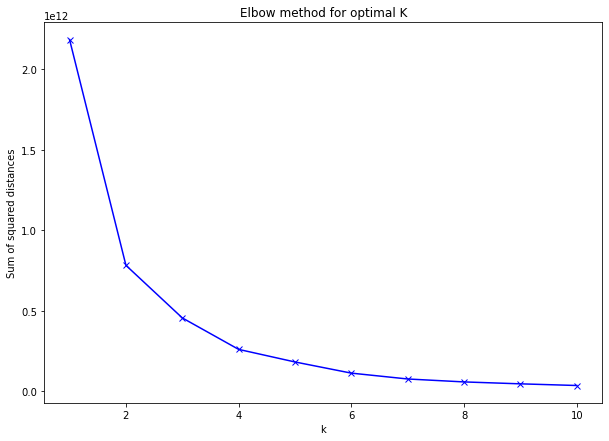

In [25]:
#Defino la cantidad de clusters con el codo de k-means
def kmeans_elbow_viz(datatotal_mod):
    sum_of_squared_distance = []
    n_cluster = range(1, 11)
    for k in n_cluster:
        kmean_model = KMeans(n_clusters=k)
        kmean_model.fit(datatotal_mod)
        sum_of_squared_distance.append(kmean_model.inertia_)
    plt.plot(n_cluster, sum_of_squared_distance,'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow method for optimal K')
    plt.show();
    
    
plt.figure(figsize=(10,7))
kmeans_elbow_viz(datatotal_elbow)

In [33]:
#Importo las librerías de Sklearn para normalizar los valores y para utilizar el método de K-means.


col_features = ['danceability', 'energy', 'valence', 'loudness']

X = MinMaxScaler().fit_transform(datatotal_mod[col_features])

kmeans = KMeans(init="k-means++",
                n_clusters=3,
                random_state=50).fit(X)

datatotal_mod['kmeans'] = kmeans.labels_

In [34]:
datatotal_mod.groupby(['kmeans']).mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
kmeans,,,,,,,,,,,,,
0,0.457563,0.858479,4.718310,-5.163113,0.591549,0.064704,0.044047,0.149958,0.203986,0.462028,131.205254,240260.591549,3.957746
1,0.672315,0.736663,6.123596,-8.162607,0.539326,0.051973,0.202430,0.264437,0.174248,0.811764,117.820258,273726.000000,3.988764
2,0.518868,0.403553,5.763158,-13.195289,0.473684,0.043382,0.434850,0.417686,0.137292,0.384805,116.919289,282932.315789,3.894737


No handles with labels found to put in legend.


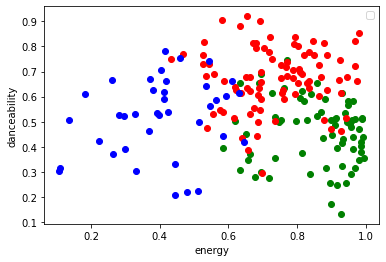

In [42]:

cluster_0 = datatotal_mod[datatotal_mod['kmeans']==0]
cluster_1  = datatotal_mod[datatotal_mod['kmeans']==1]
cluster_2  = datatotal_mod[datatotal_mod['kmeans']==2]


plt.xlabel('energy')
plt.ylabel('danceability')
plt.scatter(cluster_0.energy,cluster_0.danceability,color='green')
plt.scatter(cluster_1.energy,cluster_1.danceability,color='red')
plt.scatter(cluster_2.energy,cluster_2.danceability,color='blue')
plt.legend()

In [45]:
#Obtengo los ids y convierto las columnas del datarames en listas
ids_0 = cluster_0['id'].tolist()
ids_1 = cluster_1['id'].tolist()
ids_2 = cluster_2['id'].tolist()
#Creo las 3 listas en mi usuario
pl_cluster_verde = sp.user_playlist_create(user=username,
                                           name="Experimento #2 - Cluster verde!")
pl_cluster_rojo = sp.user_playlist_create(user=username,
                                            name="Experimento #2 - Cluster rojo!")

pl_cluster_azul = sp.user_playlist_create(user=username,
                                            name="Experimento #2 - Cluster azul!")


#Sumo las canciones a las listas
#Para Punchi Playlist
sp.user_playlist_add_tracks(user=username,
                            playlist_id = pl_cluster_verde['id'],
                            tracks=ids_0)
#Para Tranqui Playlist
sp.user_playlist_add_tracks(user=username,
                            playlist_id = pl_cluster_rojo['id'],
                            tracks=ids_1)

sp.user_playlist_add_tracks(user=username,
                            playlist_id = pl_cluster_azul['id'],
                            tracks=ids_2)

{'snapshot_id': 'MiwxZTBlZWI5ZGE0NWIzZTMyOWE0ZDBhZDVmNDk1MzI3MmZmZjlmMTkw'}